In [2]:
import pandas as pd

titanic = pd.read_csv('titanic.data')

In [3]:
df_dataset = pd.read_csv('titanic.data', sep=',', index_col=None)

In [11]:
df_dataset.shape

(891, 13)

In [12]:
df_dataset.head(n=5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,predicao
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,


Melhor

In [ ]:
df_dataset['predicao'][(df_dataset['SibSp'] == 1) & (df_dataset['Age'] < 14)] = 1
df_dataset['predicao'][(df_dataset['Sex'] == 'female')] = 1
df_dataset['predicao'][(df_dataset['Fare'] > 500)] = 1
df_dataset['predicao'][(df_dataset['Age'] == 80)] = 1

Teste

In [200]:
df_dataset['predicao'] = 0

In [203]:
df_dataset['predicao'][(df_dataset['SibSp'] == 1) & (df_dataset['Age'] < 14)] = 1
df_dataset['predicao'][(df_dataset['Sex'] == 'female')] = 1
df_dataset['predicao'][(df_dataset['Fare'] > 500)] = 1
df_dataset['predicao'][(df_dataset['Age'] == 80)] = 1

#df_dataset['predicao'][(df_dataset['Sex'] == 'male' ) & (df_dataset['Fare'])] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [204]:

print("Acurácia Geral")
print((df_dataset['Survived'] == df_dataset['predicao']).sum() / len(df_dataset))

for survived in list(df_dataset['Survived'].unique()):

  print("Acurácia da sobrevivencia", survived)
  aux = df_dataset[df_dataset['Survived'] == survived]
  print((aux['Survived'] == aux['predicao']).sum() / len(aux))

Acurácia Geral
0.8002244668911336
Acurácia da sobrevivencia 0
0.8451730418943534
Acurácia da sobrevivencia 1
0.7280701754385965


In [149]:
df_dataset['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

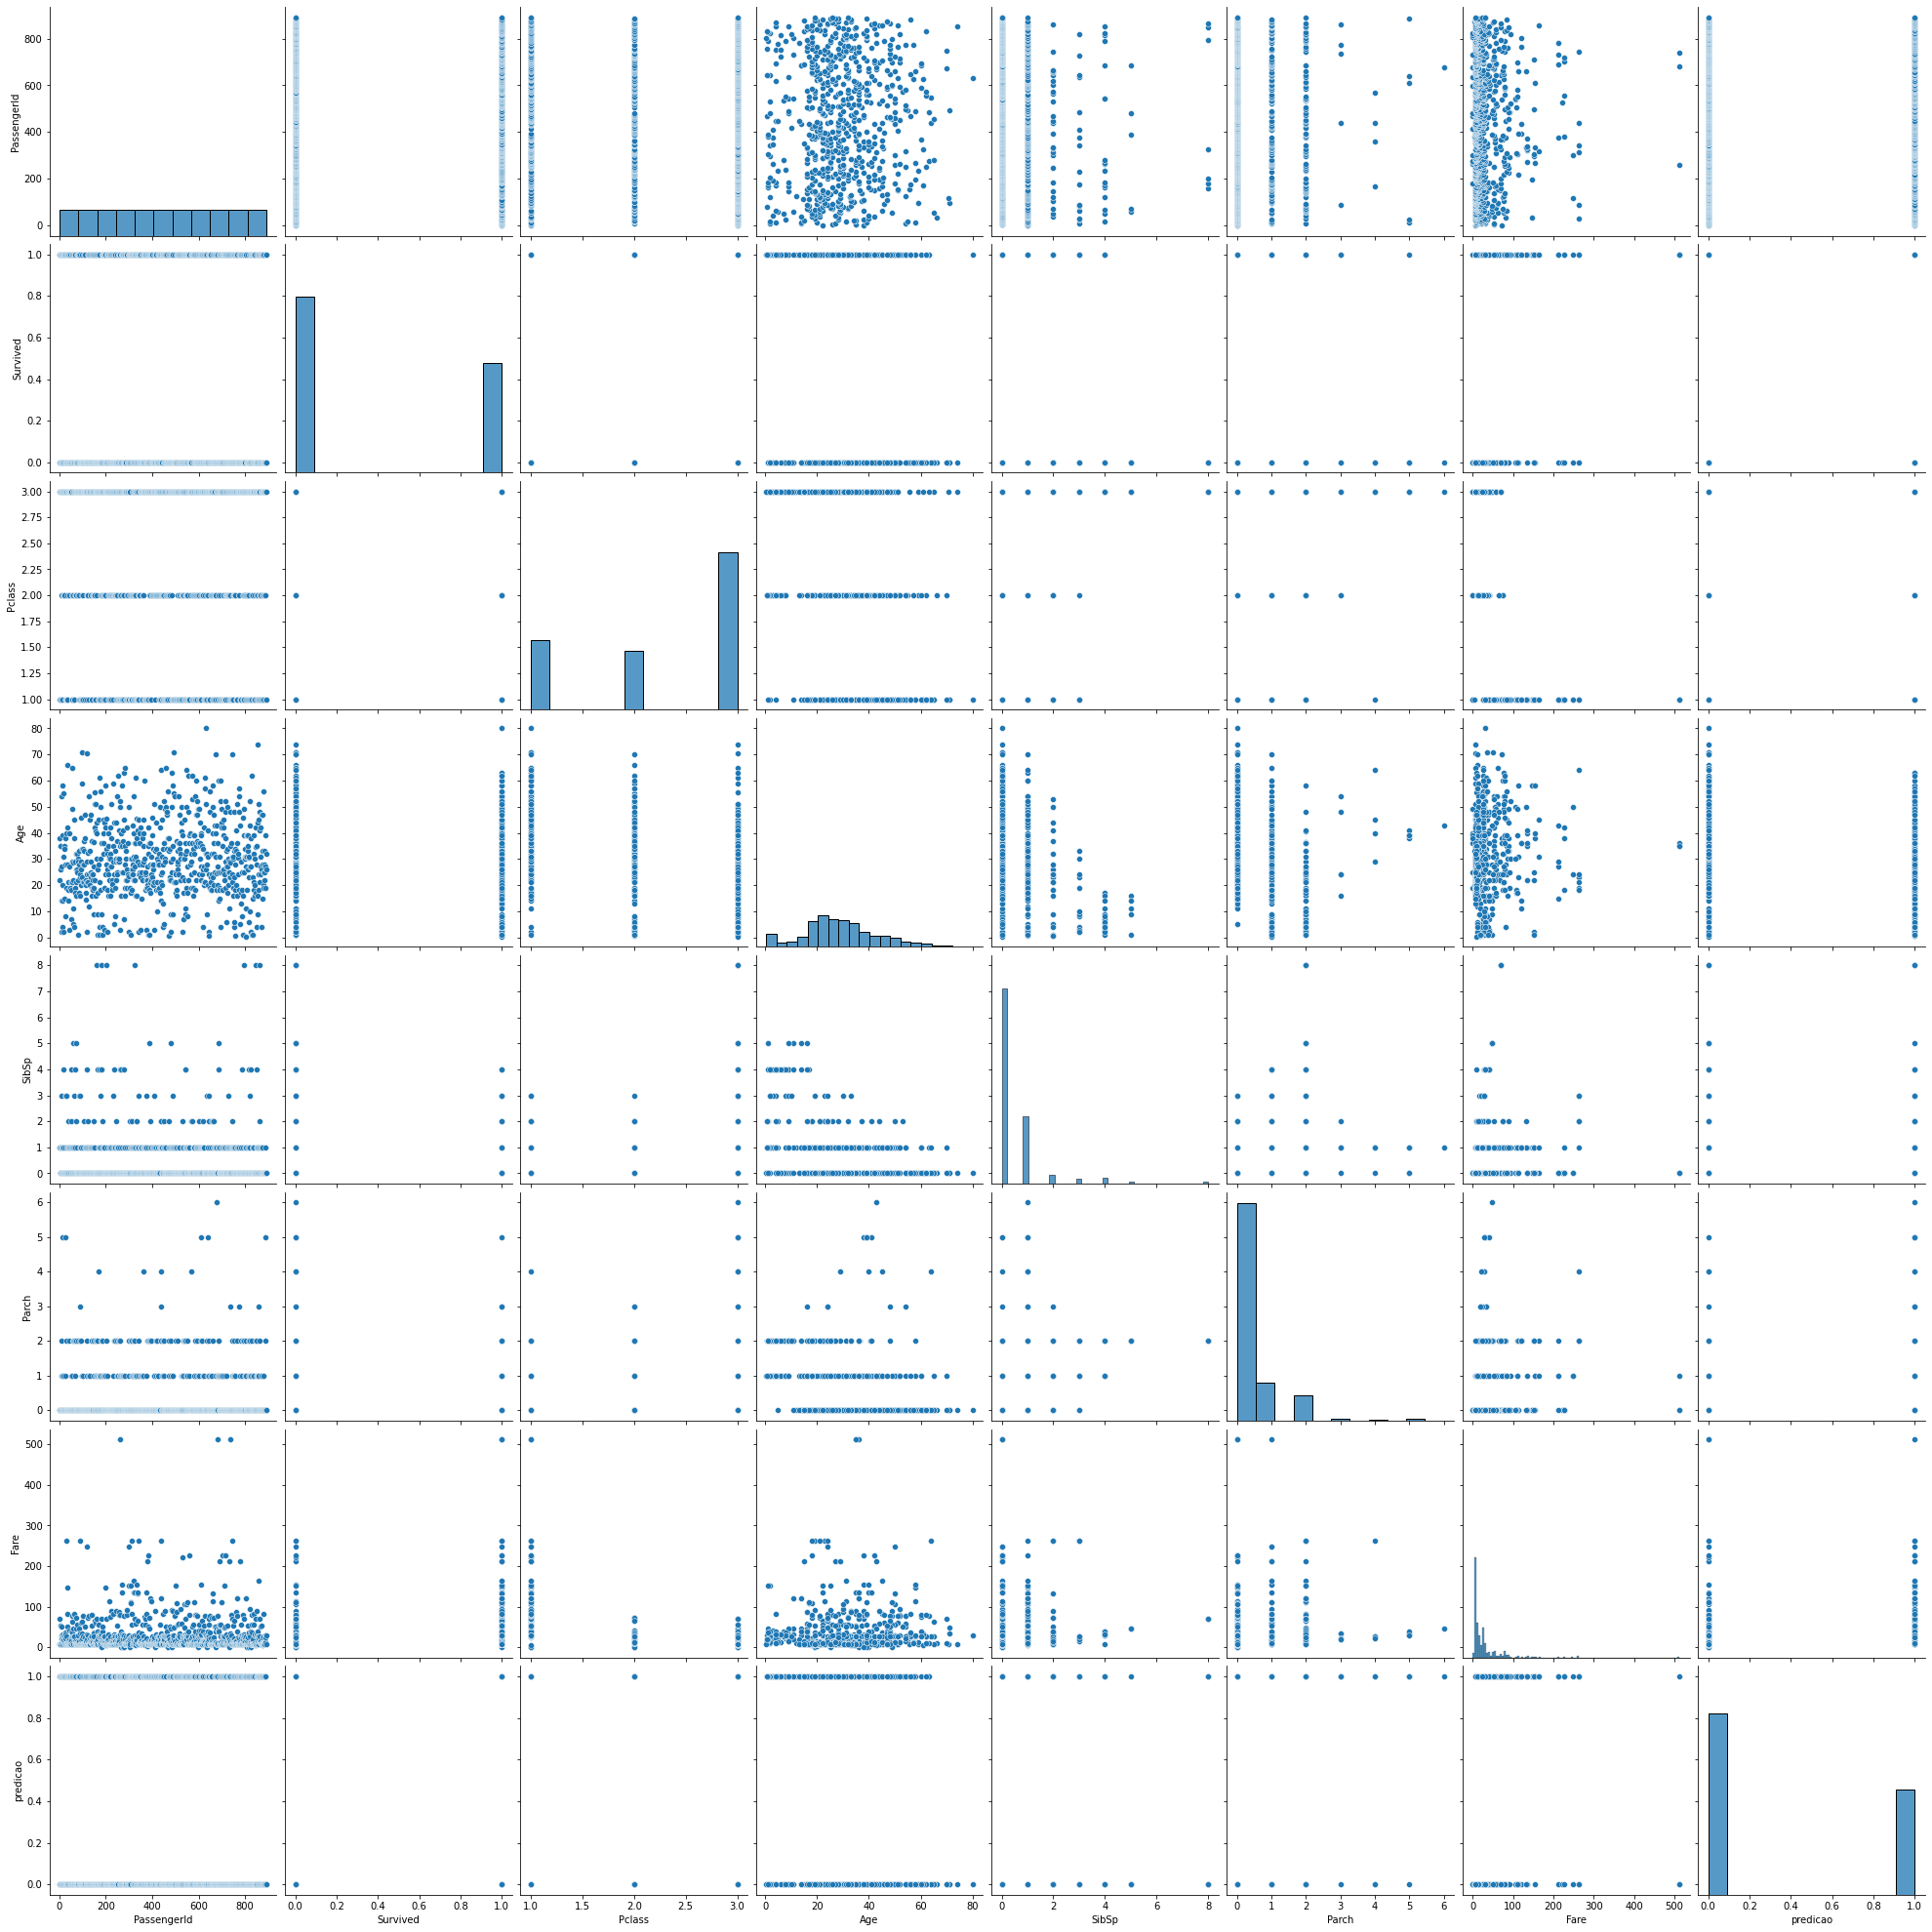

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt

# matriz de gráficos scatter 
sns.pairplot(df_dataset, height=3.5); # size -> height

# mostra o gráfico usando a função show() da matplotlib
plt.show()



Matriz de correlação: 


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,predicao
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.033361
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.576896
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.133554
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.157359
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.126717
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.272334
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.183926
predicao,-0.033361,0.576896,-0.133554,-0.157359,0.126717,0.272334,0.183926,1.000000


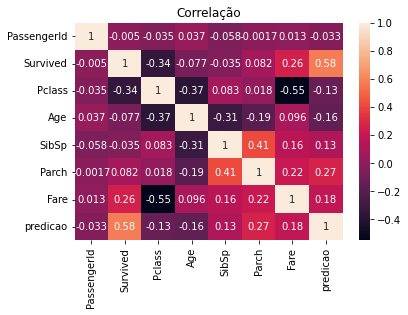

In [165]:
# criando uma matriz X com os valores do data frame
X = df_dataset.iloc[:,:-1].values # exceto a coluna da classe (a última = -1)

# com pandas
# matriz de correlação
df_correlation = df_dataset.corr()

print('\n\nMatriz de correlação: ')
display(df_correlation)

# cria um mapa de cores dos valoes da correlação
sns.heatmap(df_correlation, annot=True,
        xticklabels=df_correlation.columns,
        yticklabels=df_correlation.columns)

plt.title('Correlação')
plt.show()